<a href="https://colab.research.google.com/github/chandrikap27/digit-classification/blob/main/Digit_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1426 - accuracy: 0.9575 - val_loss: 0.0542 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0554 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0423 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0507 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0544 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0642 - accuracy: 0.9851
Test accuracy: 0.9850999712944031


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
y_pred=model.predict(x_test)
y_pred_labels=[np.argmax(i) for i in y_pred]


313/313 [==============================] - 2s 6ms/step


In [10]:
y_pred_labels[0]

7

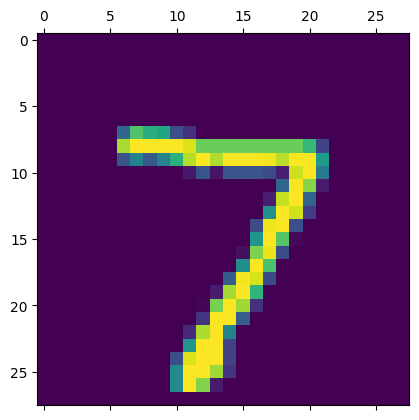

In [11]:
plt.matshow(x_test[0])

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 6ms/step


Text(120.72222222222221, 0.5, 'actual')

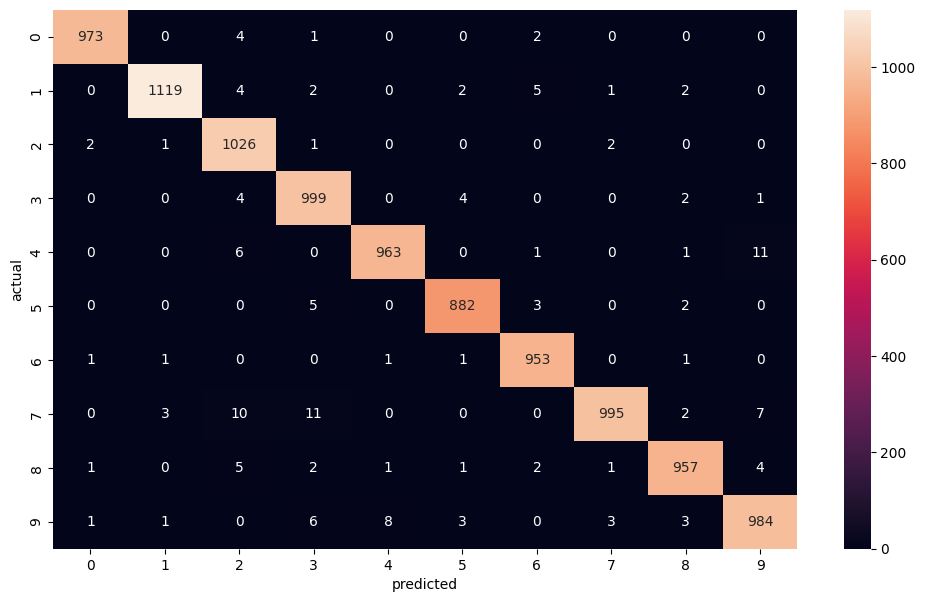

In [14]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')


In [15]:
from PIL import Image
import numpy as np
import cv2
from io import BytesIO

def img_resize(file_content):
    img_array = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_GRAYSCALE)
    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
    img_28x28 = img_28x28.reshape(1,28, 28, 1) / 255
    return img_28x28,img_pil


Saving img.jpg to img (4).jpg


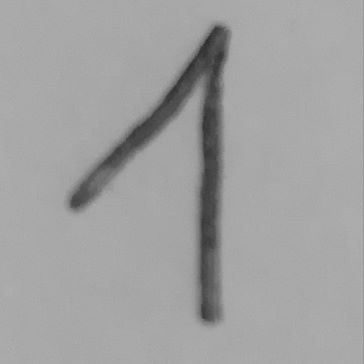

In [26]:
from google.colab import files

uploaded_file = files.upload()
file_content = uploaded_file[next(iter(uploaded_file))]
img,img_pil = img_resize(file_content)
img_pil


In [24]:
img.shape

(1, 28, 28, 1)

In [25]:
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 31ms/step
Predicted class: 1
